In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datathon2022/train.csv
/kaggle/input/datathon2022/testFeatures.csv
/kaggle/input/datathon2022/sample_solution.csv


In [2]:
train= pd.read_csv('../input/datathon2022/train.csv')
test=pd.read_csv('../input/datathon2022/testFeatures.csv')

In [3]:
#Veriyi görüntüleme
train.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [4]:
#Data alanlarımız hakkında bilgi 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45504 entries, 0 to 45503
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 45504 non-null  int64 
 1   tarih              45504 non-null  object
 2   ürün               45504 non-null  object
 3   ürün besin değeri  45504 non-null  int64 
 4   ürün kategorisi    45504 non-null  object
 5   ürün üretim yeri   45504 non-null  object
 6   market             45504 non-null  object
 7   şehir              45504 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [6]:
#Boş değer kontrolü
train.isna().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [7]:
#Kategorik sütunları görüntüleme
train.describe(include=['O'])

,tarih,ürün,ürün kategorisi,ürün üretim yeri,market,şehir
count,227520,227520,227520,227520,227520,227520
unique,60,79,6,2,3,8
top,2016-01-01,kıyma,sebze ve bakliyat,Yurt içi,M,A
freq,3792,2880,83520,113760,75840,28440


In [8]:
#tarih sütununu datetime olarak değiştirme
train["tarih"]=pd.to_datetime(train["tarih"])

In [9]:
#Alanlarımızın veri tiplerini görme
train.dtypes

tarih                datetime64[ns]
ürün                         object
ürün besin değeri             int64
ürün kategorisi              object
ürün fiyatı                 float64
ürün üretim yeri             object
market                       object
şehir                        object
dtype: object

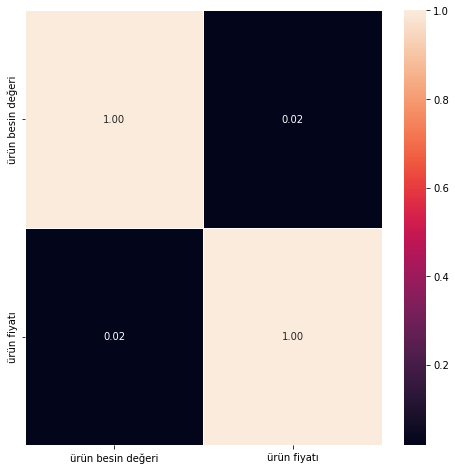

In [10]:
#sayısal alanlardaki korelasyon
corr_1 =train.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f")
plt.show()

In [11]:
#Ürün kategorisindeki benzersiz değerler
kategoriler=train["ürün kategorisi"].unique()
kategoriler

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

In [12]:
#Her kategorideki ürün sayısını görüntüleme
train["ürün kategorisi"].value_counts()

sebze ve bakliyat              83520
meyve                          51840
tahıl ve ürünleri              34560
süt ürünleri ve kahvaltılık    34560
kuruyemiş                      14400
et                              8640
Name: ürün kategorisi, dtype: int64

In [13]:
#ürünlerin satış yerlerine ve kategorilerine göre gruplayarak, ortalama fiyatını alma
market_fiyat= pd.DataFrame(train.groupby(["ürün kategorisi","market"])["ürün fiyatı"].mean())
market_fiyat

ürün fiyatı
ürün kategorisi             market             
et                          B         35.995198
                            C         35.507347
                            M         35.666330
kuruyemiş                   B         30.014744
                            C         30.032744
                            M         30.099960
meyve                       B          9.992151
                            C          9.958138
                            M         10.028312
sebze ve bakliyat           B         14.944694
                            C         14.904890
                            M         14.879722
süt ürünleri ve kahvaltılık B         25.818628
                            C         25.539446
                            M         25.500941
tahıl ve ürünleri           B          9.535002
                            C          9.521207
                            M          9.552688

[None, None, None, None, None, None, None, None, None, None, None, None]

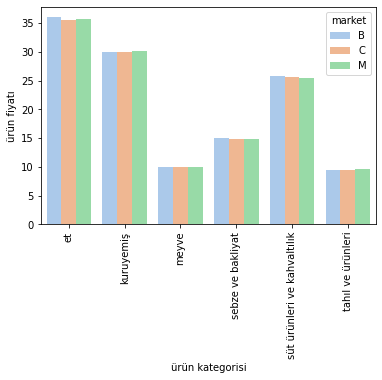

In [14]:
#ürünlerin satış yerlerine göre fiyatını görselleştirme - Bar Plot
ax=sns.barplot(y="ürün fiyatı",x="ürün kategorisi",hue="market",data=market_fiyat.reset_index(), palette="pastel")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [15]:
#Ürün üretim yeri kategorisindeki benzersiz değerler
uretim_yeri=train["ürün üretim yeri"].unique()
uretim_yeri

array(['Yurt içi', 'Yurt dışı'], dtype=object)

In [16]:
#Yurtiçi ve yurt dışında üretilen ürünlerin sayısını görüntüleme
train["ürün üretim yeri"].value_counts()

Yurt içi     113760
Yurt dışı    113760
Name: ürün üretim yeri, dtype: int64

In [17]:
#ürünlerin üretim yerlerine ve kategorilerine göre gruplayarak, ortalama fiyatını alma
yer_fiyat= pd.DataFrame(train.groupby(["ürün kategorisi","ürün üretim yeri"])["ürün fiyatı"].mean())
yer_fiyat

ürün fiyatı
ürün kategorisi             ürün üretim yeri             
et                          Yurt dışı           35.748868
                            Yurt içi            35.697049
kuruyemiş                   Yurt dışı           29.939331
                            Yurt içi            30.158968
meyve                       Yurt dışı            9.989255
                            Yurt içi             9.996480
sebze ve bakliyat           Yurt dışı           14.908812
                            Yurt içi            14.910725
süt ürünleri ve kahvaltılık Yurt dışı           25.578623
                            Yurt içi            25.660720
tahıl ve ürünleri           Yurt dışı            9.503344
                            Yurt içi             9.569253

[None, None, None, None, None, None, None, None, None, None, None, None]

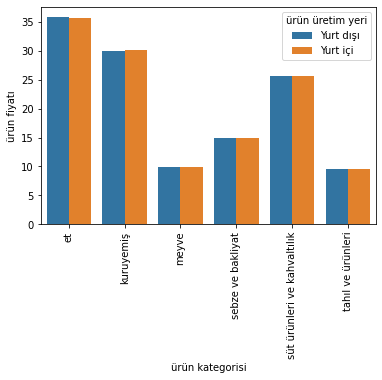

In [18]:
#ürünlerin satış yerlerine göre fiyatını görselleştirme - Bar Plot
ax=sns.barplot(y="ürün fiyatı",x="ürün kategorisi",hue="ürün üretim yeri",data=yer_fiyat.reset_index())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [19]:
#tarih sütunundan yil ve ay bilgilerini almak
train["tarih"]=pd.to_datetime(train["tarih"])

In [20]:
train["yil"]=train["tarih"].dt.year
train["ay"]=train["tarih"].dt.month
train["gun"]=train["tarih"].dt.year

In [21]:
#Yıllara göre ürünlerin fiyat ortalaması
yillara_gore_ortalama= pd.DataFrame(train.groupby(["ürün kategorisi","yil"])["ürün fiyatı"].mean())
yillara_gore_ortalama

ürün fiyatı
ürün kategorisi             yil              
et                          2016    20.122269
                            2017    25.238576
                            2018    33.369728
                            2019    44.107292
                            2020    55.776927
kuruyemiş                   2016    17.109031
                            2017    21.403479
                            2018    28.072552
                            2019    36.889337
                            2020    46.771347
meyve                       2016     5.662894
                            2017     7.090582
                            2018     9.347296
                            2019    12.291692
                            2020    15.571872
sebze ve bakliyat           2016     8.454689
                            2017    10.601573
                            2018    13.944897
                            2019    18.339276
                            2020    23.208409
süt ürünleri ve kahvaltılık 2016    14.503876
                            2017    18.188082
                            2018    23.945894
                            2019    31.546373
                            2020    39.914133
tahıl ve ürünleri           2016     5.414829
                            2017     6.779239
                            2018     8.926311
                            2019    11.723370
                            2020    14.837746

<AxesSubplot:xlabel='yil', ylabel='ürün fiyatı'>

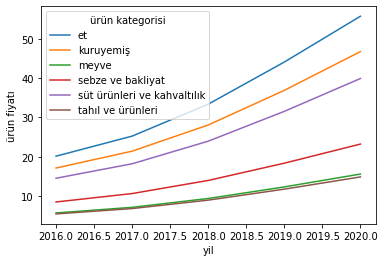

In [22]:
#Yıllara göre ürünlerin fiyat ortalamalarının artışını görselleştirme
sns.lineplot(data=yillara_gore_ortalama, x="yil", y="ürün fiyatı", hue="ürün kategorisi")